In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [37]:
data=pd.read_table("./Data_Extract_From_World_Development_Indicators_2/f55a1b6c-6a50-4ee3-bfc3-c775ea8759cc_Data.txt")

In [38]:
data


,Time,Time Code,Country Name,Country Code,Access to electricity (% of population) [EG.ELC.ACCS.ZS],Agricultural land (% of land area) [AG.LND.AGRI.ZS],Bank capital to assets ratio (%) [FB.BNK.CAPA.ZS],"Secondary education, pupils [SE.SEC.ENRL]",GDP per capita (current US$) [NY.GDP.PCAP.CD],Rural population (% of total population) [SP.RUR.TOTL.ZS],...,Children out of school (% of primary school age) [SE.PRM.UNER.ZS],"Pupil-teacher ratio, primary [SE.PRM.ENRL.TC.ZS]","Gross intake ratio in first grade of primary education, total (% of relevant age group) [SE.PRM.GINT.ZS]","School enrollment, primary (gross), gender parity index (GPI) [SE.ENR.PRIM.FM.ZS]","Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]","Population, total [SP.POP.TOTL]",Proportion of seats held by women in national parliaments (%) [SG.GEN.PARL.ZS],Total debt service (% of GNI) [DT.TDS.DECT.GN.ZS],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],Number of people spending more than 10% of household consumption or income on out-of-pocket health care expenditure [SH.UHC.OOPC.10.TO]
0,2015,YR2015,Afghanistan,AFG,71.500000,58.067580,9.232694,2698816.0,578.466353,75.197,...,NaN,44.32877,108.4754,0.68839,1.679,34413603.0,27.7,0.281553,1.451315,NaN
1,2015,YR2015,Albania,ALB,100.000000,42.857666,9.526138,315079.0,3952.830781,42.566,...,2.20127,18.61557,111.0067,1.03130,17.080,2880703.0,20.7,10.232012,2.230000,NaN
2,2015,YR2015,Algeria,DZA,99.943069,17.405929,8.826316,NaN,4177.888966,29.152,...,0.68412,23.83613,108.1113,0.95230,11.206,39728025.0,31.6,0.427837,3.763467,NaN
3,2015,YR2015,American Samoa,ASM,NaN,24.500000,NaN,NaN,11843.331183,12.762,...,NaN,NaN,NaN,NaN,NaN,55812.0,NaN,NaN,1.248050,NaN
4,2015,YR2015,Andorra,AND,100.000000,40.021275,NaN,4395.0,36039.653496,11.655,...,NaN,9.93795,NaN,NaN,NaN,78011.0,39.3,NaN,0.842204,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
data.isna().sum()

Time                                                                                                                                         3
Time Code                                                                                                                                    5
Country Name                                                                                                                                 5
Country Code                                                                                                                                 5
Access to electricity (% of population) [EG.ELC.ACCS.ZS]                                                                                     8
Agricultural land (% of land area) [AG.LND.AGRI.ZS]                                                                                         15
Bank capital to assets ratio (%) [FB.BNK.CAPA.ZS]                                                                                          145

In [40]:
data=data.drop(columns=["Time","Time Code","Country Code","Country Name","Number of people spending more than 10% of household consumption or income on out-of-pocket health care expenditure [SH.UHC.OOPC.10.TO]","Total debt service (% of GNI) [DT.TDS.DECT.GN.ZS]","Bank capital to assets ratio (%) [FB.BNK.CAPA.ZS]"])

In [41]:
data=data.dropna(axis='rows')
data.isna().sum()

Access to electricity (% of population) [EG.ELC.ACCS.ZS]                                                    0
Agricultural land (% of land area) [AG.LND.AGRI.ZS]                                                         0
Secondary education, pupils [SE.SEC.ENRL]                                                                   0
GDP per capita (current US$) [NY.GDP.PCAP.CD]                                                               0
Rural population (% of total population) [SP.RUR.TOTL.ZS]                                                   0
Population density (people per sq. km of land area) [EN.POP.DNST]                                           0
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]                                                    0
Adjusted net enrollment rate, primary (% of primary school age children) [SE.PRM.TENR]                      0
Children out of school (% of primary school age) [SE.PRM.UNER.ZS]                                           0
Pupil-teac

In [42]:
data

,Access to electricity (% of population) [EG.ELC.ACCS.ZS],Agricultural land (% of land area) [AG.LND.AGRI.ZS],"Secondary education, pupils [SE.SEC.ENRL]",GDP per capita (current US$) [NY.GDP.PCAP.CD],Rural population (% of total population) [SP.RUR.TOTL.ZS],Population density (people per sq. km of land area) [EN.POP.DNST],"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Adjusted net enrollment rate, primary (% of primary school age children) [SE.PRM.TENR]",Children out of school (% of primary school age) [SE.PRM.UNER.ZS],"Pupil-teacher ratio, primary [SE.PRM.ENRL.TC.ZS]","Gross intake ratio in first grade of primary education, total (% of relevant age group) [SE.PRM.GINT.ZS]","School enrollment, primary (gross), gender parity index (GPI) [SE.ENR.PRIM.FM.ZS]","Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]","Population, total [SP.POP.TOTL]",Proportion of seats held by women in national parliaments (%) [SG.GEN.PARL.ZS],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]
1,100.000000,42.857666,315079.0,3952.830781,42.566000,105.135146,78.025000,97.79873,2.20127,18.61557,111.00670,1.03130,17.080000,2.880703e+06,20.700000,2.230000
11,100.000000,32.941726,691071.3,44176.671743,42.285000,104.730793,81.190244,88.62591,0.47045,10.58415,98.79947,0.99097,5.723000,8.642699e+06,30.600000,1.142980
13,100.000000,1.398601,25766.0,31512.856555,17.254000,37.383217,73.088000,79.96521,18.40080,21.04116,87.15463,0.97338,12.000000,3.742060e+05,13.200000,1.044960
14,100.000000,11.053985,92454.0,22688.944400,11.001000,1763.304558,76.762000,98.02753,1.31748,11.73164,101.52670,1.00991,1.076000,1.371851e+06,7.500000,2.861968
17,100.000000,42.242016,644153.0,5949.106307,22.819000,46.751942,73.624390,94.25545,1.50754,17.57007,102.54340,1.00156,5.913000,9.489616e+06,27.300000,-3.829571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,39.399695,43.679445,58900000.0,1669.443418,61.408927,46.861951,59.952831,77.56615,20.04884,37.50596,114.13590,0.95645,6.076070,9.954585e+08,23.640948,2.815844
260,39.394007,43.680318,58900000.0,1668.215982,61.410505,46.858568,59.951484,77.56523,20.04984,37.50958,114.13660,0.95645,6.076070,9.953651e+08,23.566474,2.814316
261,39.399695,43.679445,58900000.0,1669.443418,61.408927,46.861951,59.952831,77.56615,20.04884,37.50596,114.13590,0.95645,6.076070,9.954585e+08,23.640948,2.815844
262,99.191467,35.403619,204000000.0,8032.489459,36.213422,44.469925,75.017527,96.38323,2.99216,18.32687,98.66924,0.99007,5.802802,2.597758e+09,22.366320,3.411958


In [43]:
corOfData=data.corr()
corOfData

,Access to electricity (% of population) [EG.ELC.ACCS.ZS],Agricultural land (% of land area) [AG.LND.AGRI.ZS],"Secondary education, pupils [SE.SEC.ENRL]",GDP per capita (current US$) [NY.GDP.PCAP.CD],Rural population (% of total population) [SP.RUR.TOTL.ZS],Population density (people per sq. km of land area) [EN.POP.DNST],"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Adjusted net enrollment rate, primary (% of primary school age children) [SE.PRM.TENR]",Children out of school (% of primary school age) [SE.PRM.UNER.ZS],"Pupil-teacher ratio, primary [SE.PRM.ENRL.TC.ZS]","Gross intake ratio in first grade of primary education, total (% of relevant age group) [SE.PRM.GINT.ZS]","School enrollment, primary (gross), gender parity index (GPI) [SE.ENR.PRIM.FM.ZS]","Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]","Population, total [SP.POP.TOTL]",Proportion of seats held by women in national parliaments (%) [SG.GEN.PARL.ZS],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]
Access to electricity (% of population) [EG.ELC.ACCS.ZS],1.000000,-0.213015,0.001754,0.407620,-0.679918,0.149363,0.868189,0.693242,-0.721994,-0.859718,-0.357488,0.531558,0.161777,-0.027474,0.121554,-0.004903
Agricultural land (% of land area) [AG.LND.AGRI.ZS],-0.213015,1.000000,-0.019631,-0.246361,0.181667,-0.082889,-0.292264,-0.155880,0.151598,0.239836,0.031228,-0.128189,0.172609,-0.018581,0.126185,0.055617
"Secondary education, pupils [SE.SEC.ENRL]",0.001754,-0.019631,1.000000,-0.113457,0.143631,-0.089189,-0.045585,-0.011320,0.011662,0.069820,0.027750,0.138958,-0.179322,0.997718,-0.008159,0.068565
GDP per capita (current US$) [NY.GDP.PCAP.CD],0.407620,-0.246361,-0.113457,1.000000,-0.632758,0.127719,0.631966,0.383217,-0.398751,-0.569991,-0.161076,0.259309,-0.063915,-0.119106,0.235060,-0.016753
Rural population (% of total population) [SP.RUR.TOTL.ZS],-0.679918,0.181667,0.143631,-0.632758,1.000000,-0.216131,-0.767453,-0.532571,0.524037,0.683930,0.342593,-0.379680,-0.043463,0.162062,-0.193973,0.055336
Population density (people per sq. km of land area) [EN.POP.DNST],0.149363,-0.082889,-0.089189,0.127719,-0.216131,1.000000,0.193328,0.143170,-0.151466,-0.163849,0.011943,0.132247,-0.107783,-0.091984,-0.160294,0.150510
"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",0.868189,-0.292264,-0.045585,0.631966,-0.767453,0.193328,1.000000,0.641236,-0.666292,-0.860190,-0.321068,0.534794,0.069815,-0.065698,0.222935,0.018816
"Adjusted net enrollment rate, primary (% of primary school age children) [SE.PRM.TENR]",0.693242,-0.155880,-0.011320,0.383217,-0.532571,0.143170,0.641236,1.000000,-0.982079,-0.697091,0.198245,0.426263,0.155605,-0.035060,0.203263,-0.251176
Children out of school (% of primary school age) [SE.PRM.UNER.ZS],-0.721994,0.151598,0.011662,-0.398751,0.524037,-0.151466,-0.666292,-0.982079,1.000000,0.718345,-0.190400,-0.436499,-0.155109,0.034550,-0.207221,0.267788
"Pupil-teacher ratio, primary [SE.PRM.ENRL.TC.ZS]",-0.859718,0.239836,0.069820,-0.569991,0.683930,-0.163849,-0.860190,-0.697091,0.718345,1.000000,0.321789,-0.569198,-0.204960,0.090060,-0.127981,0.137061


In [44]:
for i, row in enumerate(corOfData.values):
    for j, column in enumerate(row):
        if i>j and (corOfData.values[i][j]>0.5 or corOfData.values[i][j]<-0.5) and (corOfData.index[i] != corOfData.index[j]) :
            print(corOfData.index[i]," - ",corOfData.index[j])    

Rural population (% of total population) [SP.RUR.TOTL.ZS]  -  Access to electricity (% of population) [EG.ELC.ACCS.ZS]
Rural population (% of total population) [SP.RUR.TOTL.ZS]  -  GDP per capita (current US$) [NY.GDP.PCAP.CD]
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]  -  Access to electricity (% of population) [EG.ELC.ACCS.ZS]
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]  -  GDP per capita (current US$) [NY.GDP.PCAP.CD]
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]  -  Rural population (% of total population) [SP.RUR.TOTL.ZS]
Adjusted net enrollment rate, primary (% of primary school age children) [SE.PRM.TENR]  -  Access to electricity (% of population) [EG.ELC.ACCS.ZS]
Adjusted net enrollment rate, primary (% of primary school age children) [SE.PRM.TENR]  -  Rural population (% of total population) [SP.RUR.TOTL.ZS]
Adjusted net enrollment rate, primary (% of primary school age children) [SE.PRM.TENR]  -  Life expectancy at birth, total (years) [

In [45]:
kmeans = KMeans(n_clusters=3).fit(data)

[[8.50231912e+01 3.92367968e+01 1.43414923e+07 1.42223287e+04
  3.82604822e+01 1.19645303e+02 7.22462426e+01 9.10845150e+01
  7.64248802e+00 2.21083189e+01 1.04008247e+02 9.79953960e-01
  8.28981716e+00 1.90715740e+08 2.27221294e+01 2.73980331e+00]
 [8.82496632e+01 3.77963219e+01 4.83200000e+08 5.91612573e+03
  4.89284424e+01 6.54813205e+01 7.13024986e+01 9.14347520e+01
  7.46221200e+00 2.35730020e+01 1.04217740e+02 1.00732600e+00
  5.03979108e+00 5.96138127e+09 2.16488502e+01 3.66790235e+00]
 [8.90539130e+01 4.09228038e+01 2.47000000e+08 4.43998620e+03
  5.10552659e+01 9.42256560e+01 7.08571710e+01 9.23867833e+01
  6.51508333e+00 2.44665067e+01 1.03285180e+02 1.01406000e+00
  4.86319396e+00 2.87288602e+09 2.15335939e+01 4.55094123e+00]]


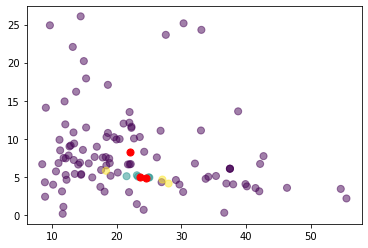

In [48]:
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(data["Pupil-teacher ratio, primary [SE.PRM.ENRL.TC.ZS]"], data['Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 9], centroids[:, 12], c='red', s=50)
